# Pay on Default of Credit Card Clients Dataset
Johan David Marín Benjumea

## Data pipeline
---
---

### Load data
---

El primer paso consiste en cargar los datos directamente desde el [repositorio](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls) para evitar la dependencia de rutas. Con el fin de garantizar el tipo correcto de variable, se utiliza un diccionario con los metadatos, de acuerdo a la información proporcionada por UCI en la descripción de la base de datos. Además, se agregan los niveles de las variables categóricas a los metadatos para facilitar la interpretación en el análisis descriptivo.

Luego, se verifican y eliminan los registros duplicados (3 en este caso), se comprueba que no existan columnas coincidentes y se transforman los datos a un formato más liviano, para ahorrar memoria RAM.

In [12]:
import warnings
warnings.filterwarnings("ignore")

# Propietarie librarie, that class allow run the data pipeline
from src.data_pipeline import DefaulerData

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
metadata_path = "metadata.yaml"

# Load sample data from the dataset, in custom path
data = DefaulerData(url, metadata_path, 10000)

Long column names detected (>25 characters). Consider renaming the following columns ['default_payment_next_month'].
Long column names detected (>25 characters). Consider renaming the following columns ['default_payment_next_month'].
Shape of cleaned data: (9997, 24) - Remaining NAs: 0


Dropped rows: 3
     of which 3 duplicates. (Rows (first 150 shown): [10251, 15459, 15618])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 1.28 MB (-67.72%)



### Exploratory analysis
---

En esta sección se encuentran procesos automatizados e interactivos para realizar el análisis exploratorio de datos.

In [13]:
# Propietarie librarie, allow speed up the process for EDA
import src.exploratory as exp

# Recode categorical variables
df_plot = exp.dataframe_unanonimized(data.df.copy(), data.metadata)

# ----------------------------------------------------------------
# For have a interactive visualization, please dowload the project in your computer.
# ----------------------------------------------------------------
# Generate profiles dataframe
report = exp.generate_profiling_report(df_plot, data.metadata)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Target

La variable default payment next month es una variable binaria tal y como se esperaba y no presenta ningún tipo de valor extraño. Sin embargo, muestra un desbalance entre las clases, donde los default representan el $22.4%$ de los registros y los not-default el $77.6%$ restante.


#### Variables Categoricas

Los atributos LIMIT_BAL, SEX y AGE son coherentes con la descripción proporcionada en el repositorio de la UCI. Las variables EDUCATION y MARRIAGE tienen valores que no corresponden con los valores indicados en la descripción de la base de datos.

Para la variable EDUCATION, se encuentran tres categorías no especificadas en la descripción del conjunto de datos; '0', '5' y '6', con un $0.1%$, $0.9%$ y $0.2%$ de los registros, respectivamente.

Mientras que para MARRIAGE, se encuentra que el $0.2%$ de los registros corresponde a una categoría '0', que no corresponde a ninguna categoría descrita anteriormente.

Por otra parte, se observó que exceptuando los valores extraños de la variable EDUCATION (el valor '0'), las variables categóricas no presentan grandes diferencias para los morosos.

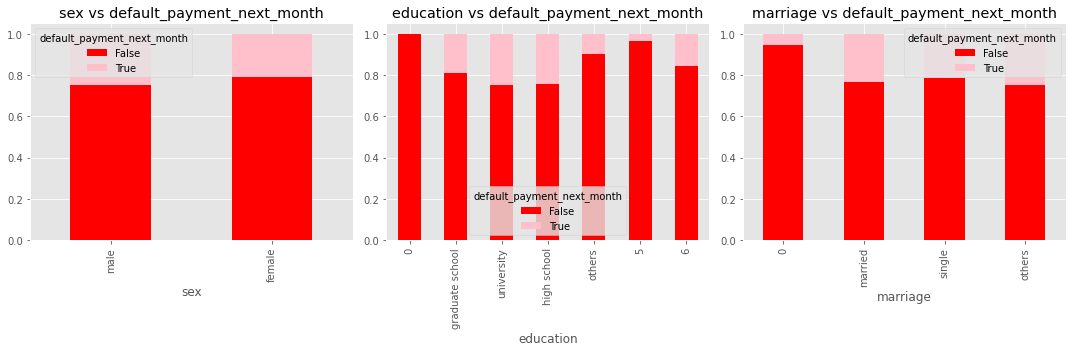

In [178]:
exp.visualize_stacked_barplots(df_plot, data.metadata["target"])

#### Variables númericas

Durante el análisis exploratorio se encontró que las variables BILL_* presentan una alta correlación entre ellas, al igual que ocurre entre las variables PAY_*.

En cuanto a los atributos PAY_*, se encontró que todos estos atributos tienen un valor mínimo igual a $-2$ en un rango del $12%$ hasta el $16.4%$ de los registros, y un valor de $0$ en un $49%$ y un $53.7%$, lo cual no se incluye en la descripción proporcionada.

Se observó que en general estas variables no presentan distribuciones normales, y al observar los boxplots de manera individual, no se evidencia una diferencia estadísticamente significativa en los valores para morosos y no morosos.

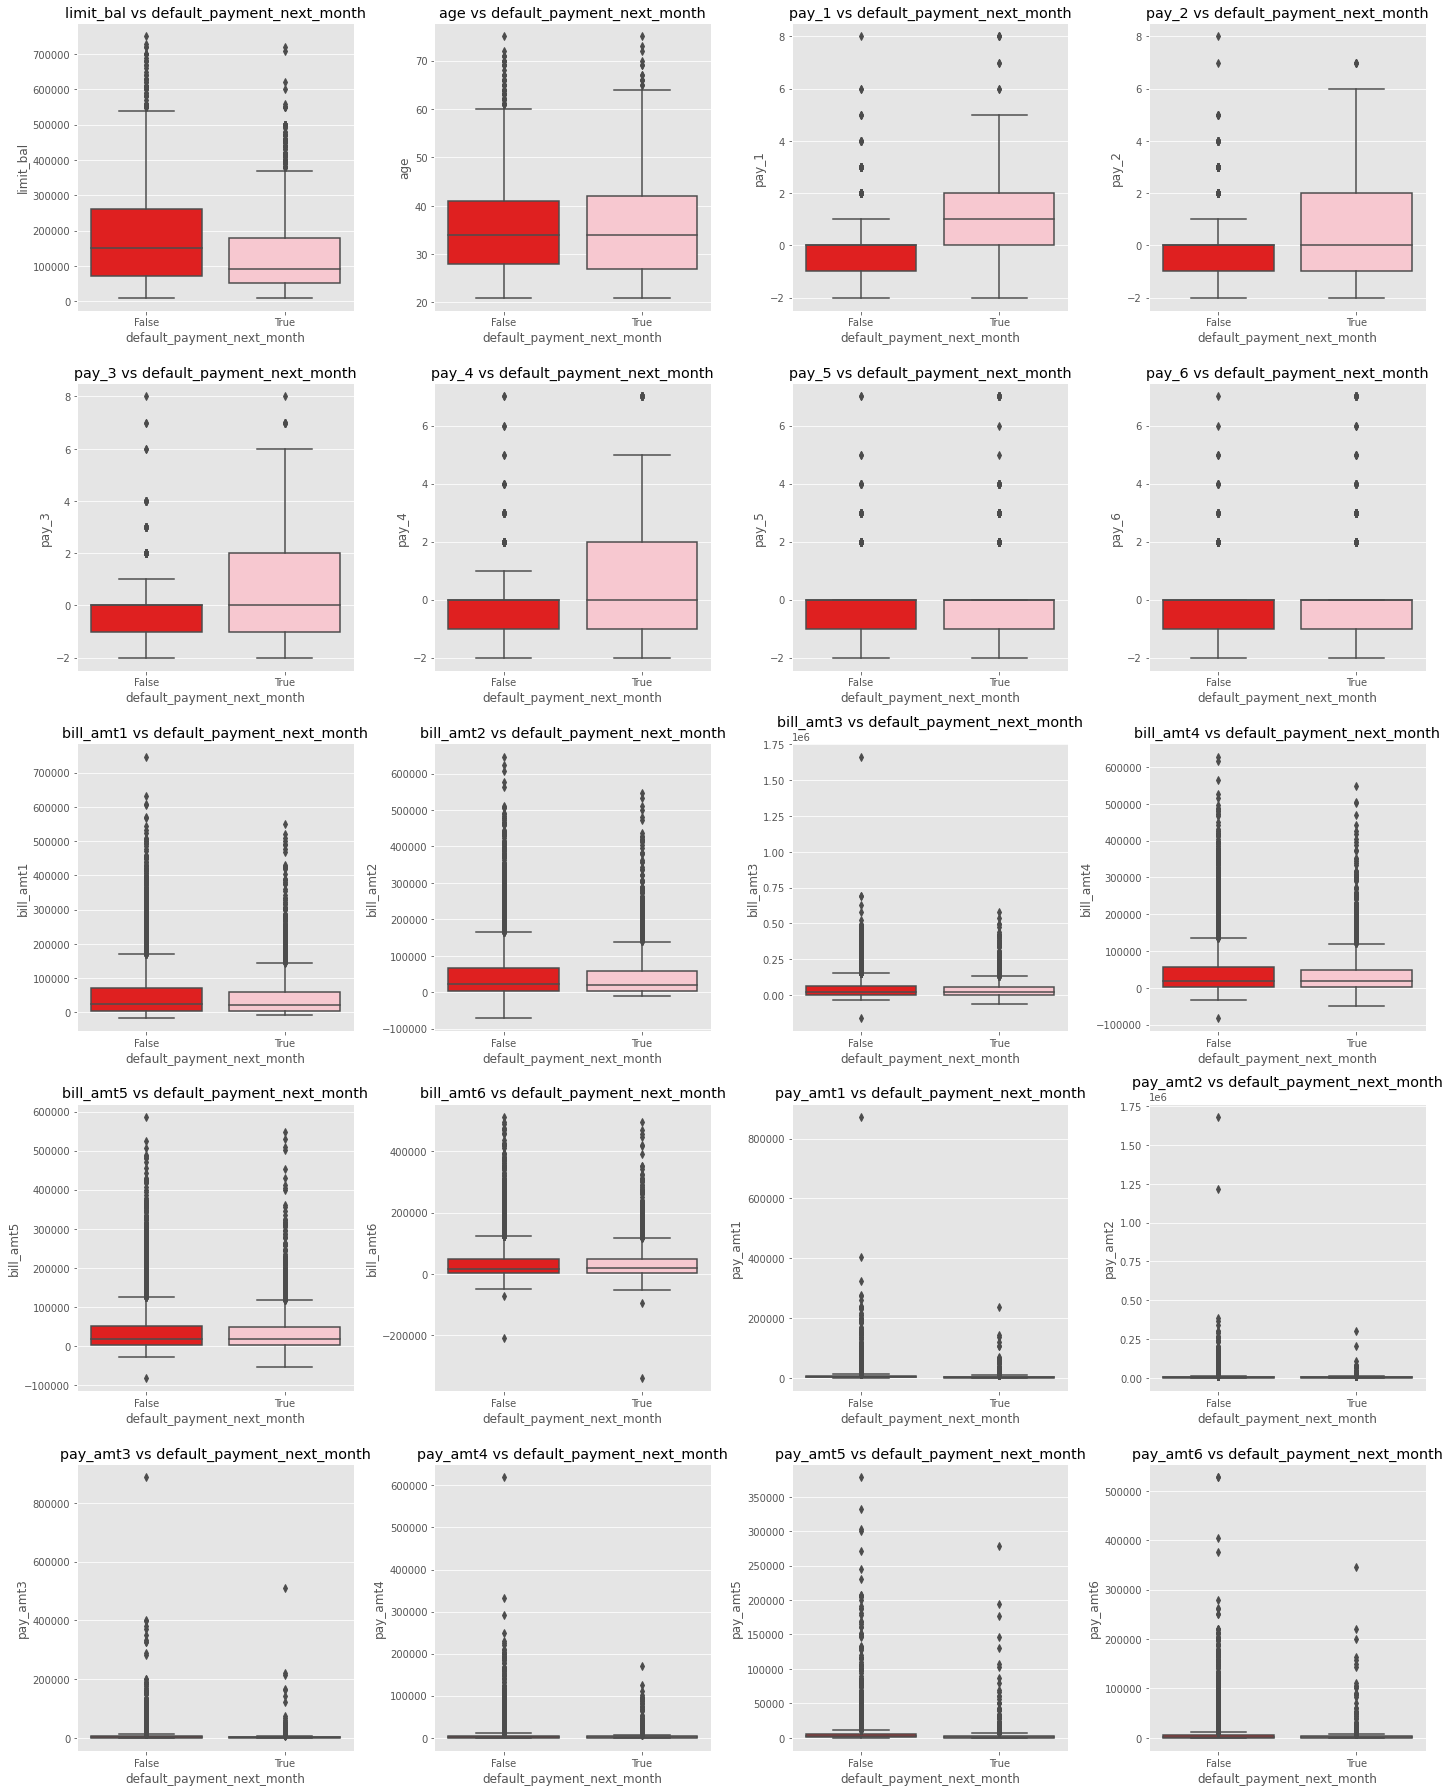

In [179]:
exp.visualize_boxplots(df_plot, data.metadata["target"])

### Limpieza de datos
---

En cuanto a las variables categóricas, se ha decidido eliminar los registros que contienen valores no correspondientes a los descritos en el repositorio de datos. Dado que estos representan un pequeño porcentaje de los registros, se evita afectar la calidad de los datos y posiblemente introducir valores atípicos. En total se eliminan 130 filas, lo que corresponde al 1.3% de los registros.

En el caso de las variables numéricas, debido a los altos porcentajes de valores atípicos y a que la eliminación de valores atípicos utilizando el método de z-score no presenta un cambio significativo en la asimetría de las variables, se ha decidido no eliminar los valores atípicos detectados. Dado que el problema es crítico para detectar morosos, en futuras versiones del modelo se podría considerar la posibilidad de utilizar un método como isolation tree para verificar el efecto de estos valores atípicos.

In [23]:
print(f"Shape before remove rare values in categorical variables{data.df.shape}")
data.cleasing_data()
print(f"Shape after remove rare values in categorical variables{data.df.shape}")

Shape before remove rare values in categorical variables(9997, 24)
Shape after remove rare values in categorical variables(9867, 24)


limit_bal have a 0.4601380414124237 % outliers


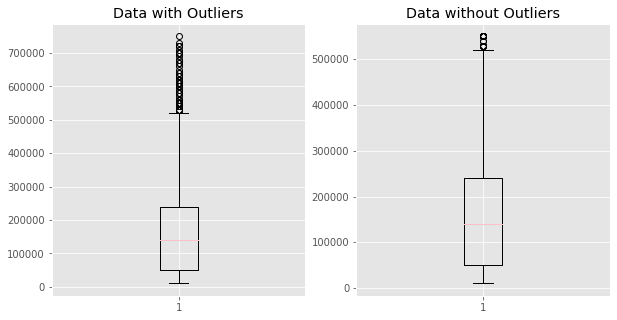

age have a 0.5301590477143143 % outliers


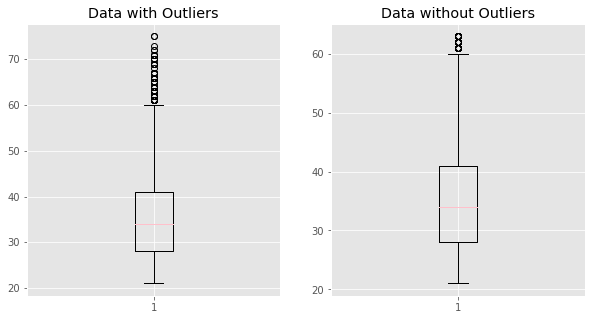

pay_1 have a 0.4701410423126938 % outliers


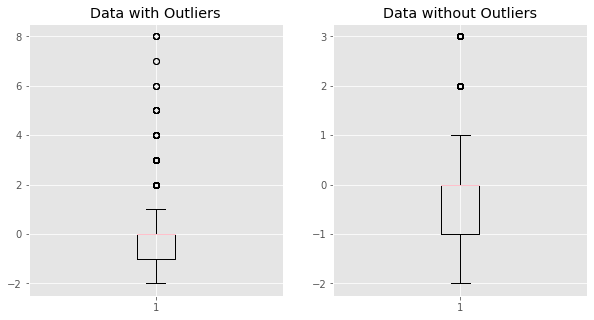

pay_2 have a 0.4801440432129639 % outliers


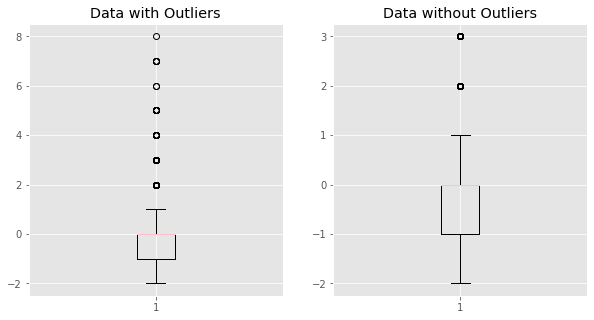

pay_3 have a 0.4701410423126938 % outliers


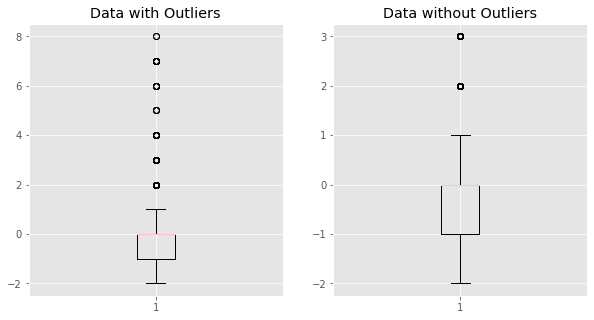

pay_4 have a 0.49014704411323395 % outliers


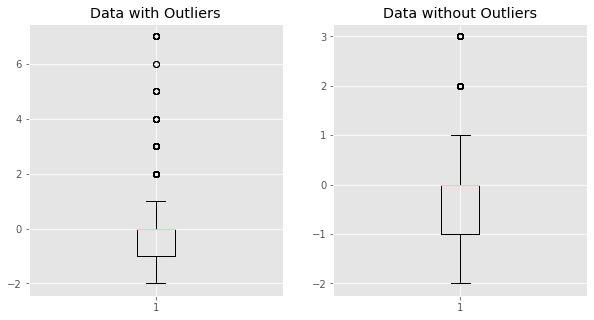

pay_5 have a 0.5101530459137742 % outliers


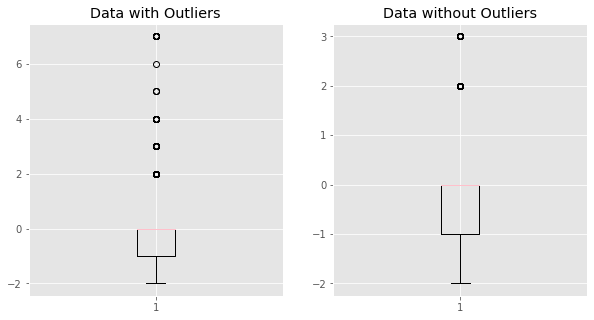

pay_6 have a 0.4701410423126938 % outliers


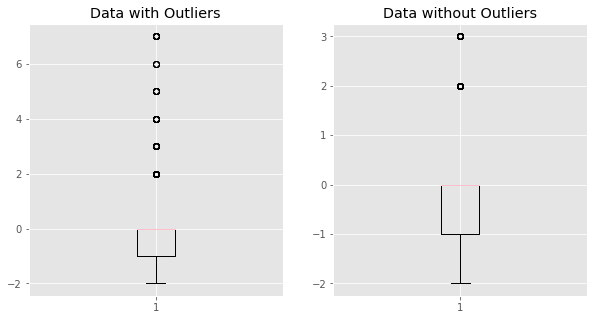

bill_amt1 have a 2.3006902070621185 % outliers


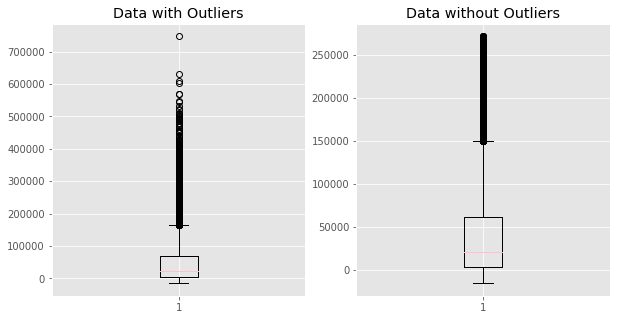

bill_amt2 have a 2.260678203461038 % outliers


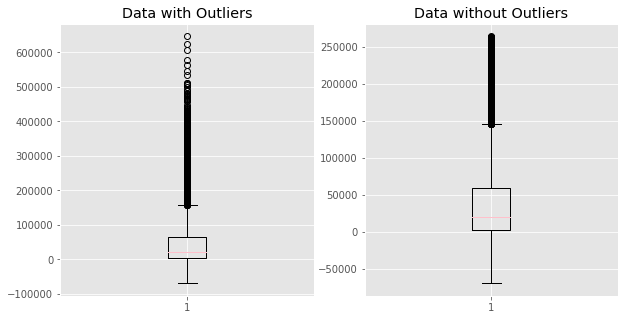

bill_amt3 have a 2.0706211863559068 % outliers


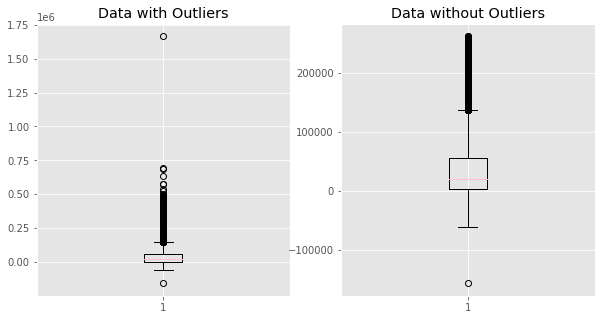

bill_amt4 have a 2.1606481944583376 % outliers


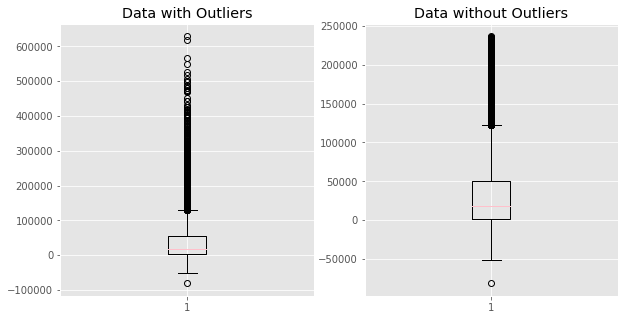

bill_amt5 have a 2.0306091827548265 % outliers


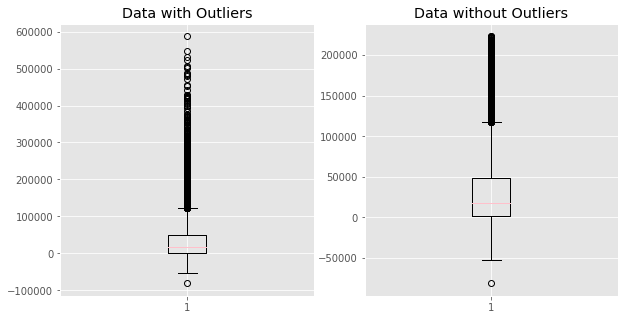

bill_amt6 have a 2.1306391917575276 % outliers


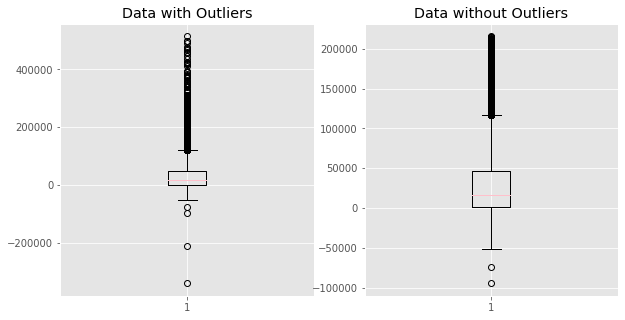

pay_amt1 have a 1.2703811143343002 % outliers


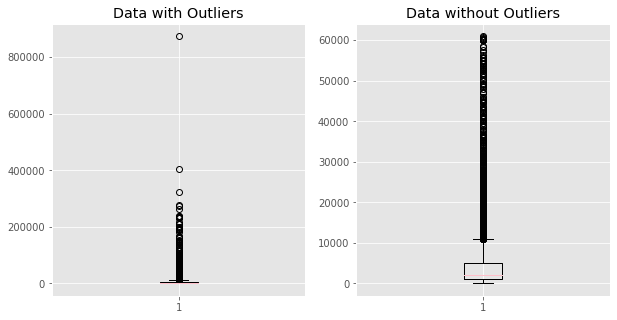

pay_amt2 have a 0.7902370711213365 % outliers


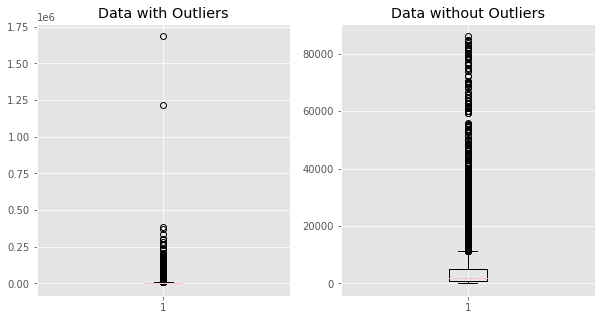

pay_amt3 have a 1.0903270981294388 % outliers


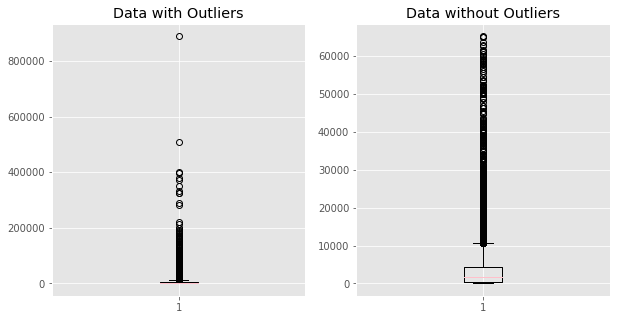

pay_amt4 have a 1.4004201260378113 % outliers


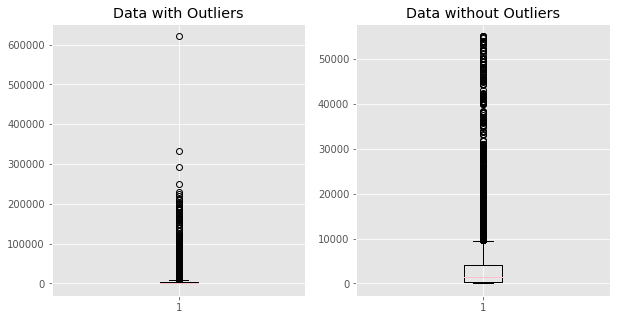

pay_amt5 have a 1.350405121536461 % outliers


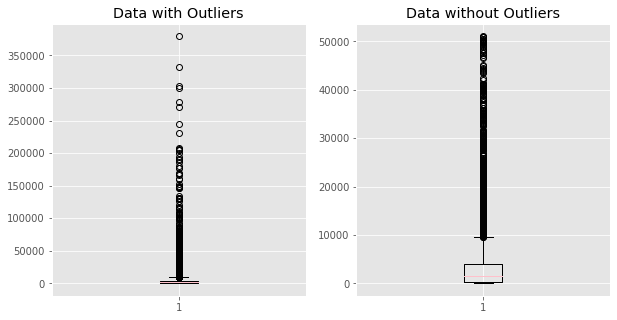

pay_amt6 have a 1.4204261278383514 % outliers


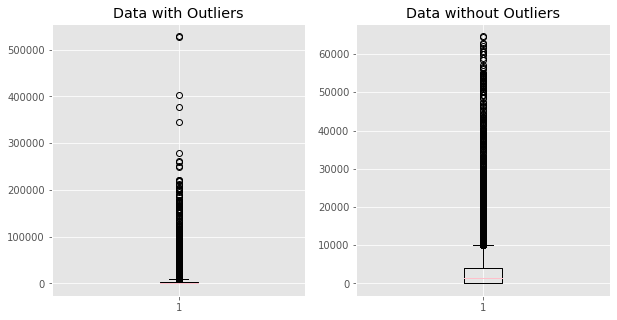

In [180]:
# Ploting numerical variables before to eliminated outliers(left plot) and after to eliminated outliers(right plot)
exp.analize_outliers_zscore(data.df)

### Ingeniería de Características
---

#### Variables Númericas

Debido a la correlación observada entre varias de las variables numéricas y teniendo en cuenta las diferencias entre las variables consigo mismas (se evidencia en la asimetría), se propone construir dos nuevas variables relativas, porcentaje adeudado y porcentaje pagado.

$$PER\_BILL = \frac{BILL\_AMT}{LIMIT\_BAL}$$
$$PER\_PAY = \frac{PAY\_AMT}{LIMIT\_BAL}$$

Además de esto, se observó que la mayor correlación se da entre las variables PAY_2 hasta PAY_6, por lo que se propone una nueva variable que exprese la tendencia entre estas.


$$slope = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

Finalmente, para evitar que la diferencia de escala entre las variables pueda afectar el modelo, se realiza un escalado de todas las variables numéricas.


#### Variables Categoricas

Teniendo en cuenta los pocos niveles que poseen todas las variables categóricas, se hace uso de one-hot encoding.


In [10]:
import src.exploratory as exp
data.build_features()
data.train_scaler()
df_plot = exp.dataframe_unanonimized(data.df.copy(), data.metadata)
data.encoding_catagories()

Long column names detected (>25 characters). Consider renaming the following columns ['default_payment_next_month'].
Shape of cleaned data: (9867, 37) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 1.57 MB (-54.9%)

Long column names detected (>25 characters). Consider renaming the following columns ['default_payment_next_month'].
Shape of cleaned data: (9867, 43) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 4
     of which 4 single valued.     Columns: ['education_0', 'education_5', 'education_6', 'marriage_0']
Dropped missing values: 0
Reduced memory by at least: 0.03 MB (-2.17%)



In [11]:
report = exp.generate_profiling_report(df_plot, data.metadata)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Finalmente se guardan los datos en un archivo *data_model.csv* para hacer uso de estos en el modelo.

In [10]:
# Save features names
data.save_columns()
# Save data
data.save_data()

## Model pipeline
---
---


### Selección de metrica
---
nicialmente, no se considera la métrica de *Accuracy* ya que esta es sensible al desbalanceo entre clases. El *recall* es interesante ya que se centra en maximizar el número de morosos detectados y, por consiguiente, aumenta el número de usuarios gestionados. Sin embargo, esta métrica puede incrementar el costo de la gestión ya que se pueden llegar a intervenir un gran número de clientes no morosos y causar inconformidad en estos últimos. Si se opta por la *precision*, es posible que disminuyan los costos de gestión y se enfoque en llamar solo a clientes morosos, pero esto puede llevar a no identificar todos los clientes morosos. Por lo tanto, se opta por hacer uso de la métrica *F1-score*, que realiza una compensación entre la precision y el recall.

### Descripción del pipeline

Para la construcción del modelo se ha decidido usar el algoritmo de Random Forest debido a su capacidad de manejar conjuntos de datos con alta dimensionalidad y la capacidad de seleccionar automáticamente las características más importantes.

Se realizará un preprocesamiento de los datos, incluyendo una transformación de One-Hot Encoding para las variables categóricas, escalamiento de las variables numéricas y creación de nuevas variables derivadas de las variables originales.

Luego se realizará una separación de los datos en conjuntos de entrenamiento y prueba, con un tamaño de 70% para el conjunto de entrenamiento y un tamaño de 30% para el conjunto de prueba.

Se ajustará el modelo a los datos de entrenamiento y se realizará una validación cruzada con k = 5 para evaluar el rendimiento del modelo. Se seleccionará el modelo con la mejor puntuación F1-score.

Finalmente, se evaluará el modelo seleccionado en el conjunto de prueba y se generarán las predicciones correspondientes.





In [14]:
# Custom library, import model pipeline
from src.model_pipeline import DefaultModeler
# Path clean data to train model
file_path = "C:/Users/57318/Desktop/default-of-credit-card-clients/data_model.csv"
# Instance model pipeline on load data
modeler = DefaultModeler(file_path)
# Select features and target values
modeler.set_vars_training()

Long column names detected (>25 characters). Consider renaming the following columns ['default_payment_next_month'].
Shape of cleaned data: (9867, 42) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 1.76 MB (-56.77%)



### Feature Selection
---

In [15]:
# Feature selection plots
import  src.model_pipeline.feature_selection as fs

#### Feature selection with importances

Utilizando la importancia de las variables, se obtuvieron aquellas más relevantes para predecir el impago. Con un proceso iterativo, se calculó el número óptimo de variables para el modelo, determinándose que son 29 variables. Además, mediante el uso de PCA se logró reducir la dimensionalidad a 21 componentes.

In [24]:
# Train features selectors
modeler.fit_selectors()
# Plot importance for variables
fs.plot_importances(modeler.df_importances)

In [17]:
# Plot fitted model vs # variables
fs.plot_number_features(modeler.feature_analisis)

#### Feature Extraction with PCA

Haciendo un análisis grafico de la varianza del PCA para diferente número de variables 

In [18]:
# Plot the pca vs # components 
fs.plot_pca_variance(modeler.X)

### Selección de modelo e hiperparametros
---

Teniendo en cuenta que la variable respuesta está desbalanceada, se realiza un undersampling sobre las variables de entrenamiento para igualar el número de la categoría dominante a la otra y de esta manera disminuir la probabilidad de sesgo en el modelo.

In [19]:
# Split train, test data
modeler.split_train_test()

# Train model
modeler.train_models()

In [22]:
# Summary model results
modeler.get_log_training()

data                                     estimator  \
0  default      RandomForestClassifier(random_state=123)   
1  default  GradientBoostingClassifier(random_state=123)   
2  default                        KNeighborsClassifier()   
0   filter      RandomForestClassifier(random_state=123)   
1   filter  GradientBoostingClassifier(random_state=123)   
2   filter                        KNeighborsClassifier()   
0      pca      RandomForestClassifier(random_state=123)   
1      pca  GradientBoostingClassifier(random_state=123)   
2      pca                        KNeighborsClassifier()   

                                               model metric     score  \
0  (DecisionTreeClassifier(max_features='sqrt', r...     f1  0.680441   
1  ([DecisionTreeRegressor(criterion='friedman_ms...     f1  0.686947   
2                             KNeighborsClassifier()     f1  0.634618   
0  (DecisionTreeClassifier(max_features='sqrt', r...     f1  0.675549   
1  ([DecisionTreeRegressor(criterion='friedman_ms...     f1  0.687776   
2                             KNeighborsClassifier()     f1  0.656731   
0  (DecisionTreeClassifier(max_features='sqrt', r...     f1  0.665771   
1  ([DecisionTreeRegressor(criterion='friedman_ms...     f1  0.671387   
2                             KNeighborsClassifier()     f1  0.637548   

                                              params  precision_train  \
0  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...         1.000000   
1  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...         0.800525   
2  {'algorithm': 'auto', 'leaf_size': 30, 'metric...         0.788760   
0  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...         0.999397   
1  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...         0.809398   
2  {'algorithm': 'auto', 'leaf_size': 30, 'metric...         0.791209   
0  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...         1.000000   
1  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...         0.825408   
2  {'algorithm': 'auto', 'leaf_size': 30, 'metric...         0.784987   

   recall_train  f1_train  precision_test  recall_test   f1_test  
0      1.000000  1.000000        0.412595     0.666667  0.509725  
1      0.735826  0.766813        0.423596     0.661404  0.516438  
2      0.736429  0.761697        0.388889     0.626316  0.479839  
0      0.999397  0.999397        0.435632     0.664912  0.526389  
1      0.737636  0.771852        0.422551     0.650877  0.512431  
2      0.738239  0.763807        0.382892     0.659649  0.484536  
0      1.000000  1.000000        0.435350     0.643860  0.519462  
1      0.732811  0.776358        0.429078     0.636842  0.512712  
2      0.744270  0.764087        0.394737     0.631579  0.485830

In [20]:
# Allow use model for prediction in production
modeler.use_model()

In [21]:
# Get the predictions
modeler.predictions

array([0., 1., 0., ..., 1., 0., 0.])